In [32]:
import pandas as pd
import numpy as np
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

# Load the .txt file
# Construct the file path
file_path = os.path.join(rpath, 'data', 'clean_data.csv')

# Skip lines with too many fields
# Try with different delimiters
data = pd.read_csv(file_path)  # Tab-delimited
data.head()

C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4077301918.py:16: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)  # Tab-delimited


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,ProfitMargin
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,100.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,100.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,100.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN


In [33]:
# Define target variable
target = 'TotalPremium'

# Bin the target variable for classification
bins = [-np.inf, 0, 10, 50, 100, 500, 1000, np.inf]  # Define bins based on the data distribution
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme High', 'Extremely High']
data['PremiumCategory'] = pd.cut(data[target], bins=bins, labels=labels)
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,ProfitMargin,PremiumCategory
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,100.0,Medium
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,100.0,Medium
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN,Very Low
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,100.0,Extreme High
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN,Very Low


In [34]:
# Define target variable
target = 'TotalPremium'

# Define bins for three categories
bins = [-np.inf, 10, 100, np.inf]  # Define bins to group into Low, Medium, High
labels = ['Low', 'Medium', 'High']  # Labels for the bins

# Bin the target variable
data['PremiumCategory'] = pd.cut(data[target], bins=bins, labels=labels)

# Check the new category distribution
print(data['PremiumCategory'].value_counts())


PremiumCategory
Low       702268
Medium    167372
High      130458
Name: count, dtype: int64


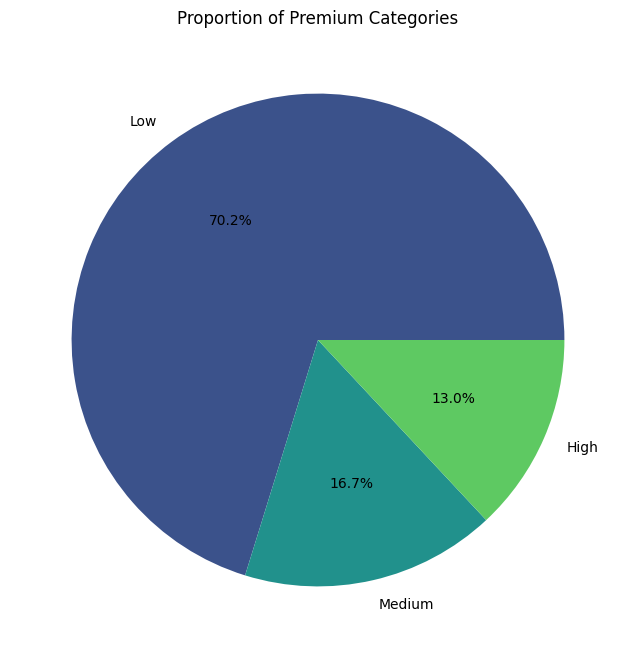

In [35]:
import matplotlib.pyplot as plt
# Calculate the proportion of each category
category_counts = data['PremiumCategory'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=len(category_counts)))

# Add title
plt.title('Proportion of Premium Categories')
plt.show()


C:\Users\AII\AppData\Local\Temp\ipykernel_14848\2431753894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='PremiumCategory', palette='viridis')


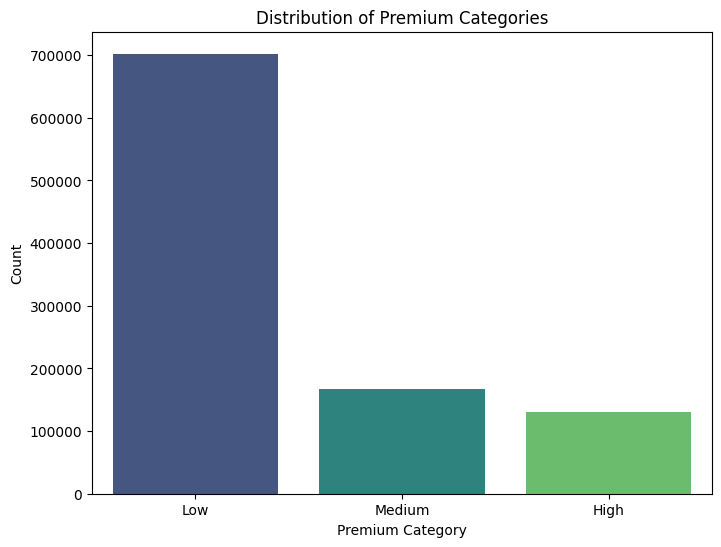

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the binned target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='PremiumCategory', palette='viridis')

# Add titles and labels
plt.title('Distribution of Premium Categories')
plt.xlabel('Premium Category')
plt.ylabel('Count')
plt.show()


**For each zipcode, fit a linear regression model that predicts the total claims**

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming data is your DataFrame with relevant data

# List of ZIP codes (assuming PostalCode is ZIP code)
zip_codes = data['PostalCode'].unique()

# Initialize a dictionary to store models and metrics
models = {}
metrics = {}

for zip_code in zip_codes:
    df_zip = data[data['PostalCode'] == zip_code]

    # Prepare features and target
    X = df_zip.drop(columns=['TotalClaims'])
    y = df_zip['TotalClaims']

    # Encode categorical features
    X_encoded = pd.get_dummies(X)

    # Check for missing values and handle them
    if X_encoded.isnull().any().any():
        #print(f"Missing values found for ZIP code: {zip_code}")
        X_encoded.fillna(0, inplace=True)  # Impute missing values (e.g., with 0 or another strategy)

    # Check for infinite values and handle them
    if np.isinf(X_encoded).any().any():
        #print(f"Infinite values found for ZIP code: {zip_code}")
        X_encoded.replace([np.inf, -np.inf], 0, inplace=True)  # Replace infinity with 0 or another strategy

    # Fit Linear Regression Model
    model = LinearRegression()
    model.fit(X_encoded, y)

    # Predict and calculate metrics
    y_pred = model.predict(X_encoded)
    mse = mean_squared_error(y, y_pred)

    # Store model and metrics
    models[zip_code] = model
    metrics[zip_code] = mse

print("Model Metrics by ZIP Code:", metrics)


Model Metrics by ZIP Code: {np.int64(1459): np.float64(0.0), np.int64(1513): np.float64(0.0), np.int64(1619): np.float64(0.0003409847981353991), np.int64(1625): np.float64(9.088880622154247e-24), np.int64(1629): np.float64(0.0), np.int64(1852): np.float64(1848759.0030450502), np.int64(1982): np.float64(10633.79235380858), np.int64(2007): np.float64(0.0), np.int64(2066): np.float64(4.5413174399823423e-07), np.int64(4093): np.float64(3004276.6657784604), np.int64(2000): np.float64(3192121.5275746156), np.int64(1577): np.float64(0.0), np.int64(1610): np.float64(3.4148617942162475e-15), np.int64(2410): np.float64(956016.9474112419), np.int64(6200): np.float64(1.515381797019557e-17), np.int64(122): np.float64(2648058.538359255), np.int64(1520): np.float64(1.1961546598145614e-19), np.int64(1709): np.float64(1.9586393878244293e-11), np.int64(1739): np.float64(4681419.469455021), np.int64(4000): np.float64(1752402.8701536297), np.int64(4066): np.float64(7577866.860763085), np.int64(4091): np.f

In [7]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'UnderwrittenCoverID', 'PolicyID',
       'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType',
       'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender',
       'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone',
       'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make',
       'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype',
       'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate',
       'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding',
       'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'SumInsured',
       'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected',
       'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product',
       'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims',
       'ProfitMargin', 'ClaimToPremiumRatio', 'PremiumToClaimRatio'],
      dtype='object')

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

zip_df = data[['TotalClaims','PostalCode']]

# Prepare features and target
X = zip_df.drop(columns=['TotalClaims'])  # Exclude PostalCode and target variable
y = zip_df['TotalClaims']

# Encode categorical features
X_encoded = pd.get_dummies(X)

# Check for missing values and handle them
if X_encoded.isnull().any().any():
    print("Missing values found. Handling missing values by filling with 0.")
    X_encoded.fillna(0, inplace=True)  # Impute missing values (e.g., with 0 or another strategy)

# Check for infinite values and handle them
if np.isinf(X_encoded).any().any():
    print("Infinite values found. Handling infinite values by replacing with 0.")
    X_encoded.replace([np.inf, -np.inf], 0, inplace=True)  # Replace infinity with 0 or another strategy

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate metrics for the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print overall model performance
print("Overall Model Performance:")
print(f"  - Mean Squared Error (MSE): {mse:.2f}")
print(f"  - R² Score: {r2:.2f}")


Overall Model Performance:
  - Mean Squared Error (MSE): 4886385.39
  - R² Score: 0.00


**Using a Sets of features about the car to be insured, about the owner and owners Location**

In [17]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\AII\Desktop\Insurance-Data-Analytics\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'ProfitMargin',
       'PremiumCategory'],
      dtype='object')
RandomForest - Accuracy: 0.70, F1 Score: 0.58, Precision: 0.75, Recall: 0.70
Feature Importa

C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4053468674.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


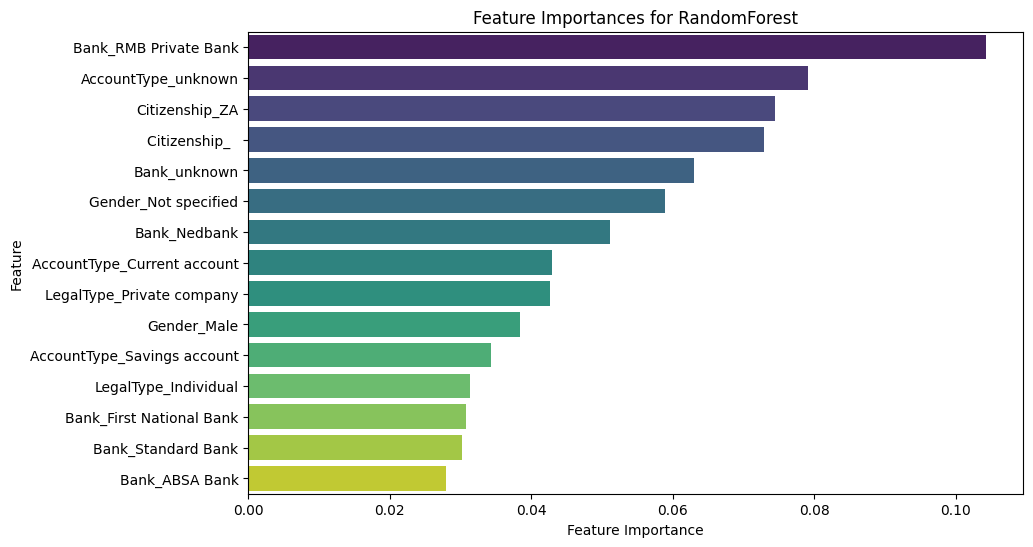

Missing values in transformed features:
0    0
dtype: int64
DecisionTree - Accuracy: 0.70, F1 Score: 0.58, Precision: 0.75, Recall: 0.70
Feature Importances for DecisionTree:
                             Feature  Importance
27             Bank_RMB Private Bank    0.134482
2                     Citizenship_      0.123290
33               AccountType_unknown    0.105229
40              Gender_Not specified    0.099950
9          LegalType_Private company    0.071092
29                      Bank_unknown    0.059264
25                      Bank_Nedbank    0.044969
4                     Citizenship_ZA    0.042973
31       AccountType_Savings account    0.038180
18                    Bank_ABSA Bank    0.032729
35       MaritalStatus_Not specified    0.031798
20          Bank_First National Bank    0.027966
19                 Bank_Capitec Bank    0.025309
14                          Title_Mr    0.024627
28                Bank_Standard Bank    0.020830
30       AccountType_Current account    0

C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4053468674.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


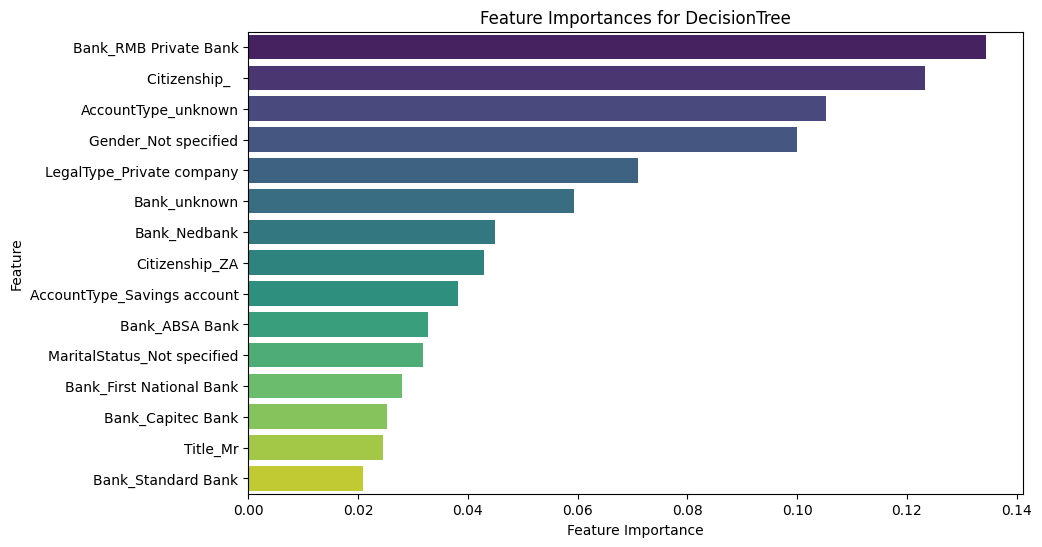

Missing values in transformed features:
0    0
dtype: int64
XGBoost - Accuracy: 0.70, F1 Score: 0.58, Precision: 0.75, Recall: 0.70
Feature Importances for XGBoost:
                             Feature  Importance
33               AccountType_unknown    0.181004
27             Bank_RMB Private Bank    0.156642
40              Gender_Not specified    0.110020
35       MaritalStatus_Not specified    0.069211
37             MaritalStatus_unknown    0.056935
9          LegalType_Private company    0.045456
41                    Gender_unknown    0.043306
29                      Bank_unknown    0.039494
25                      Bank_Nedbank    0.033746
4                     Citizenship_ZA    0.025051
2                     Citizenship_      0.019081
19                 Bank_Capitec Bank    0.017727
31       AccountType_Savings account    0.017436
36              MaritalStatus_Single    0.016651
10          LegalType_Public company    0.013023
28                Bank_Standard Bank    0.011003
18

C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4053468674.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


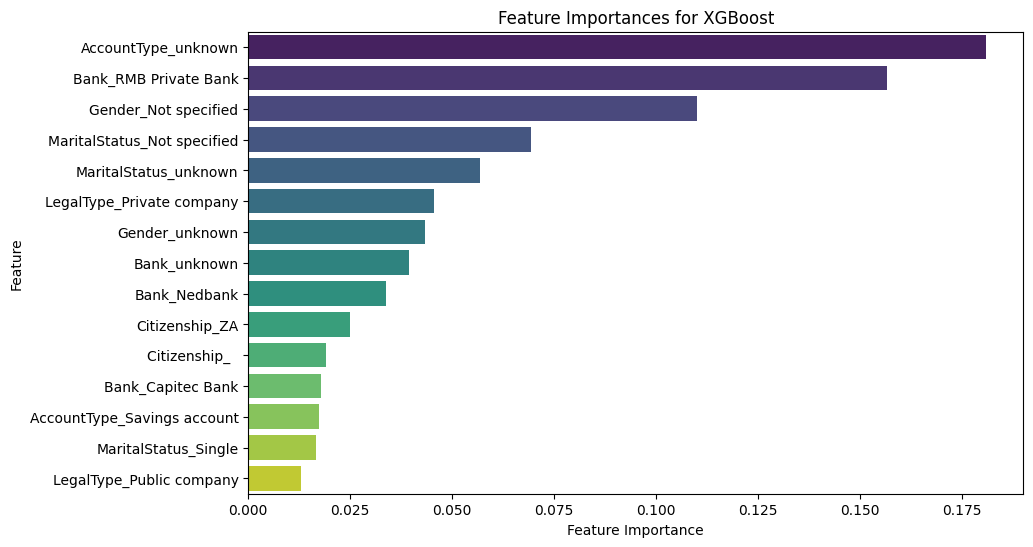

Missing values in transformed features:
0    0
dtype: int64


In [37]:
# Ensure the correct column names match your dataset
print(data.columns)

# Define categorical columns
categorical_cols = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 
                    'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender']

# Define target variable
target = 'PremiumCategory'

# Prepare features and target
X = data[categorical_cols]
y = data[target]

# Handle missing values for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Combine transformers for categorical columns only
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define classification models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
}

# Iterate over models and use SHAP
for name, model in models.items():
    # Create a pipeline that preprocesses the data and fits the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict and calculate metrics
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"{name} - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

    # Get and print feature importances
    if hasattr(model, 'feature_importances_'):
        # Get feature importances for tree-based models
        importances = model.feature_importances_
        feature_names = (pipeline.named_steps['preprocessor']
                                     .transformers_[0][1]  # Access categorical transformer
                                     .named_steps['onehot'].get_feature_names_out(categorical_cols))
        
        # Combine feature names
        feature_names = np.concatenate([feature_names])  # No numerical_cols in this example
        feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
        print(f"Feature Importances for {name}:")
        print(feature_importances)

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')
        plt.title(f'Feature Importances for {name}')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()

    # Check for NaNs after transformation
    X_transformed = preprocessor.fit_transform(X)
    print("Missing values in transformed features:")
    print(pd.DataFrame(X_transformed).isnull().sum())


In [49]:
# Get feature names after one-hot encoding
feature_names = (pipeline.named_steps['preprocessor']
                         .transformers_[0][1]  # Access categorical transformer
                         .named_steps['onehot'].get_feature_names_out(categorical_cols))
feature_names

array(['IsVATRegistered_False', 'IsVATRegistered_True', 'Citizenship_  ',
       'Citizenship_AF', 'Citizenship_ZA', 'Citizenship_ZW',
       'LegalType_Close Corporation', 'LegalType_Individual',
       'LegalType_Partnership', 'LegalType_Private company',
       'LegalType_Public company', 'LegalType_Sole proprieter',
       'Title_Dr', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
       'Language_English', 'Bank_ABSA Bank', 'Bank_Capitec Bank',
       'Bank_First National Bank', 'Bank_FirstRand Bank',
       'Bank_Investec Bank', 'Bank_Ithala Bank',
       'Bank_Mercantile Lisbon Bank', 'Bank_Nedbank', 'Bank_Old Mutual',
       'Bank_RMB Private Bank', 'Bank_Standard Bank', 'Bank_unknown',
       'AccountType_Current account', 'AccountType_Savings account',
       'AccountType_Transmission account', 'AccountType_unknown',
       'MaritalStatus_Married', 'MaritalStatus_Not specified',
       'MaritalStatus_Single', 'MaritalStatus_unknown', 'Gender_Female',
       'Gender_Male',

In [50]:
import shap

# Get the model from the pipeline
model = pipeline.named_steps['classifier']

# Create a SHAP explainer
explainer = shap.Explainer(model)

# Transform your training data using the preprocessor
X_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

# Calculate SHAP values
shap_values = explainer(X_transformed)


In [52]:
print(type(shap_values))
print(shap_values.shape)


<class 'shap._explanation.Explanation'>
(800078, 42, 3)


In [53]:
import shap
print(shap.__version__)


0.46.0


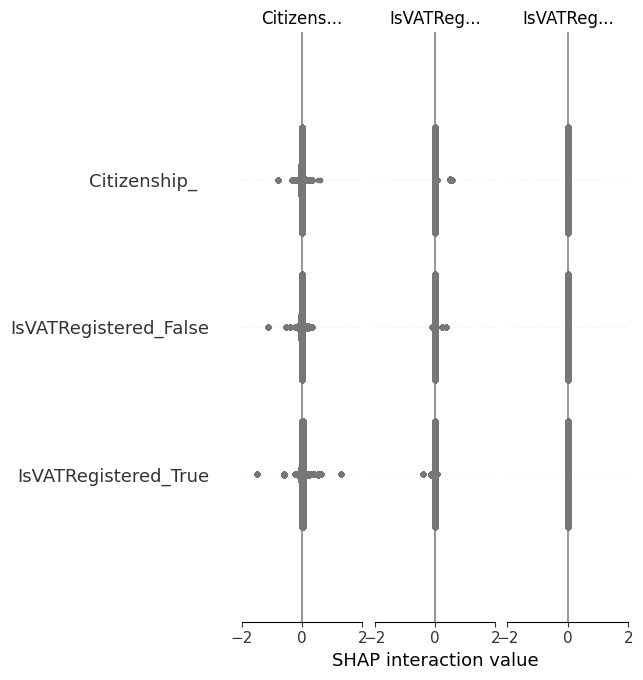

In [57]:
# Summary Plot
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)


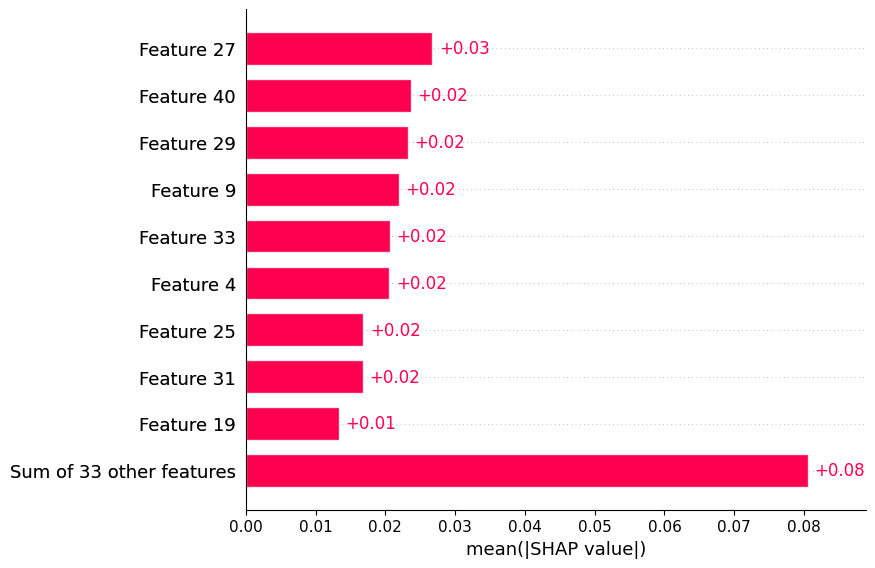

In [54]:
shap_values_class_0 = shap_values[:, :, 0]  # Adjust index based on your class of interest
shap.plots.bar(shap_values_class_0)


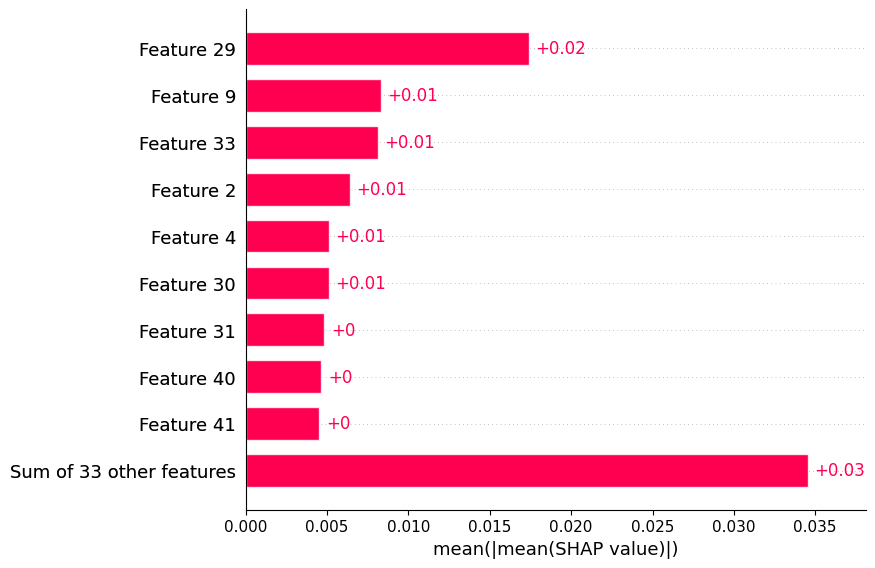

In [55]:
shap_values_avg = shap_values.mean(axis=2)  # Average across classes
shap.plots.bar(shap_values_avg)


In [56]:
print(model.classes_)  # To see the class labels of your classifier


[0 1 2]


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'ProfitMargin',
       'PremiumCategory'],
      dtype='object')


C:\Users\AII\AppData\Local\Temp\ipykernel_14848\3364791370.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\AII\AppData\Local\Temp\ipykernel_14848\3364791370.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols].fillna(X[numerical_cols].median(), inplace=True)  # Impute missing numerical values with median


RandomForest - Accuracy: 0.70, F1 Score: 0.58, Precision: 0.59, Recall: 0.70
Feature Importances for RandomForest:
                           Feature  Importance
4              CustomValueEstimate    0.401379
482  NewVehicle_More than 6 months    0.092493
483             NewVehicle_unknown    0.084075
1                    cubiccapacity    0.038694
2                        kilowatts    0.036296
..                             ...         ...
468                   bodytype_D/S    0.000007
82           Model_50 C13D F/C D/C    0.000007
488                    Rebuilt_Yes    0.000006
96               Model_A4 2.0 (B7)    0.000003
103  Model_A4 3.0 TDI QUATTRO (B7)    0.000003

[493 rows x 2 columns]


C:\Users\AII\AppData\Local\Temp\ipykernel_14848\3364791370.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


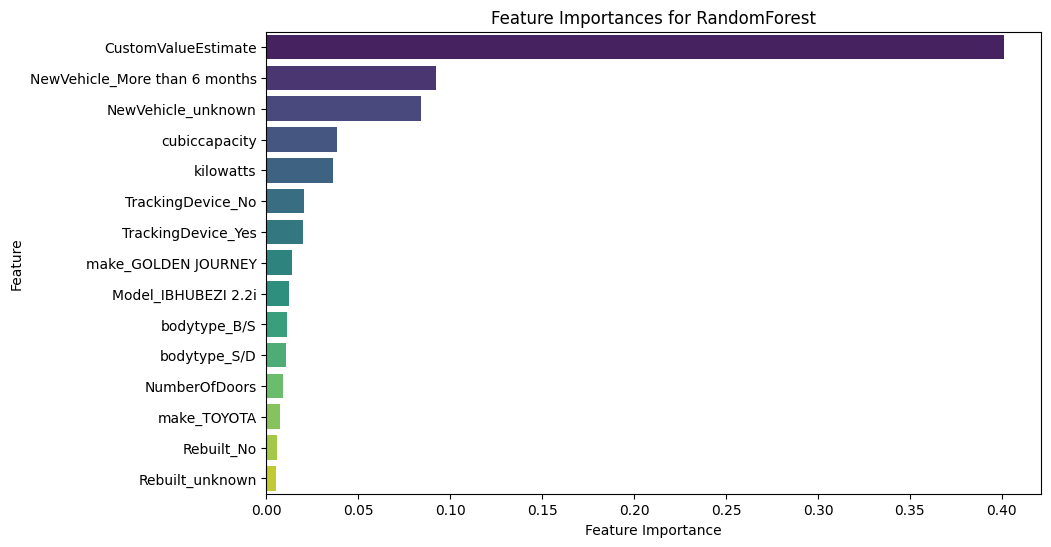

DecisionTree - Accuracy: 0.70, F1 Score: 0.58, Precision: 0.59, Recall: 0.70
Feature Importances for DecisionTree:
                                      Feature  Importance
4                         CustomValueEstimate    0.305734
483                        NewVehicle_unknown    0.213743
1                               cubiccapacity    0.066482
2                                   kilowatts    0.055121
480                        TrackingDevice_Yes    0.030438
..                                        ...         ...
457                           VehicleType_Bus    0.000000
27   make_JMC                                    0.000000
18   make_GEELY                                  0.000000
15                                  make_FORD    0.000000
9    make_CHERY                                  0.000000

[493 rows x 2 columns]


C:\Users\AII\AppData\Local\Temp\ipykernel_14848\3364791370.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


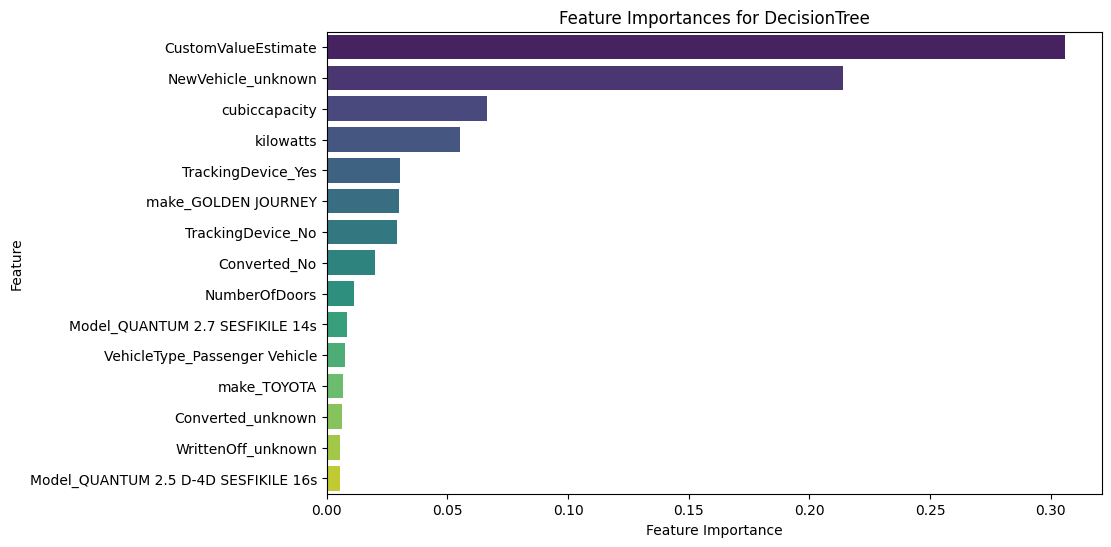

XGBoost - Accuracy: 0.70, F1 Score: 0.58, Precision: 0.73, Recall: 0.70
Feature Importances for XGBoost:
                                      Feature  Importance
483                        NewVehicle_unknown    0.178798
19                        make_GOLDEN JOURNEY    0.042506
461             VehicleType_Passenger Vehicle    0.018199
268                       Model_IBHUBEZI 2.2i    0.014517
339           Model_QUANTUM 2.7 SESFIKILE 15s    0.012499
..                                        ...         ...
462                       VehicleType_unknown    0.000000
466                              bodytype_CCL    0.000000
468                              bodytype_D/S    0.000000
9    make_CHERY                                  0.000000
492                         Converted_unknown    0.000000

[493 rows x 2 columns]


C:\Users\AII\AppData\Local\Temp\ipykernel_14848\3364791370.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


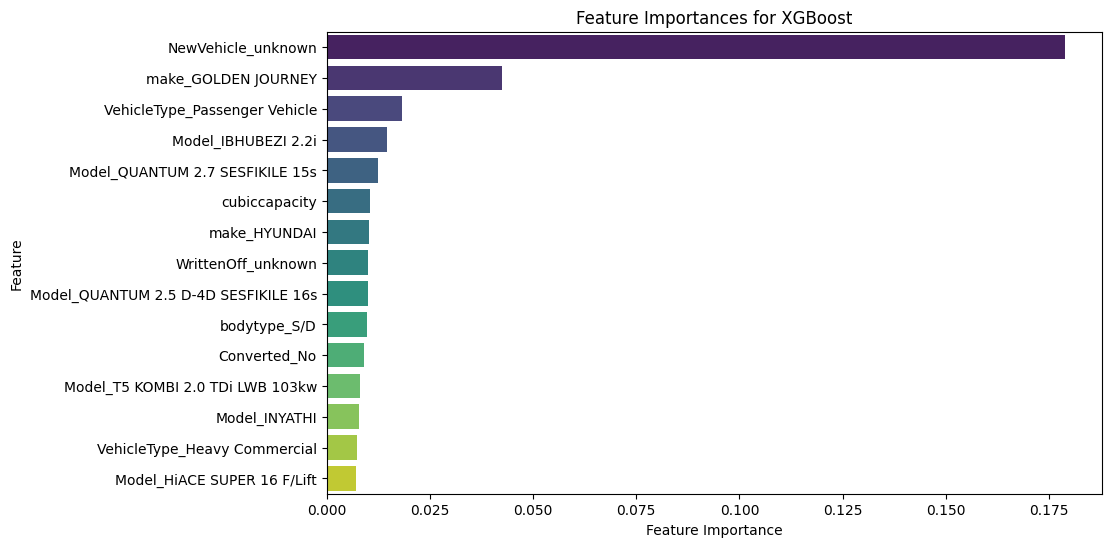

In [31]:
# Ensure column names match your dataset
print(data.columns)

# Adjust features list based on the correct column names
numerical_cols = ['Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate']
categorical_cols = ['make', 'Model', 'VehicleType', 'bodytype', 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 
                    'WrittenOff', 'Rebuilt', 'Converted']

target = 'PremiumCategory'  # Update to the new classification target

# Prepare data
X = data[numerical_cols + categorical_cols]
y = data[target]

# Step 1: Handle infinite or large values in numerical columns (not target)
X[numerical_cols].replace([np.inf, -np.inf], np.nan, inplace=True)
X[numerical_cols].fillna(X[numerical_cols].median(), inplace=True)  # Impute missing numerical values with median

# Step 2: Handle missing values for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Fill missing values with 'Unknown'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Handle missing values for target
y = y.dropna()

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Combine transformers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Step 3: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Define classification models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    # Create a pipeline that preprocesses the data and fits the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
    precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
    
    print(f"{name} - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

    # Get and print feature importances
    if hasattr(model, 'feature_importances_'):
        # Get feature importances for tree-based models
        importances = model.feature_importances_
        feature_names = (pipeline.named_steps['preprocessor']
                                     .transformers_[1][1]  # Access categorical transformer
                                     .named_steps['onehot'].get_feature_names_out(categorical_cols))
        
        # Combine numerical and categorical feature names
        all_features = np.concatenate([numerical_cols, feature_names])
        feature_importances = pd.DataFrame({'Feature': all_features, 'Importance': importances})
        feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
        print(f"Feature Importances for {name}:")
        print(feature_importances)

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')
        plt.title(f'Feature Importances for {name}')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'ProfitMargin',
       'PremiumCategory'],
      dtype='object')
Missing values in training features:
Province          0
Country           0
PostalCode     

c:\Users\AII\Desktop\Insurance-Data-Analytics\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4001952802.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


RandomForest - Accuracy: 0.70, F1 Score: 0.58, Precision: 0.56, Recall: 0.70
Feature Importances for RandomForest:
                  Feature  Importance
434       PostalCode_2196    0.053765
588       PostalCode_4067    0.018512
391       PostalCode_2000    0.017070
123        PostalCode_400    0.011269
826       PostalCode_7800    0.009705
..                    ...         ...
405       PostalCode_2055    0.000050
469       PostalCode_2841    0.000048
112        PostalCode_356    0.000046
25          PostalCode_46    0.000045
9    Country_South Africa    0.000000

[957 rows x 2 columns]


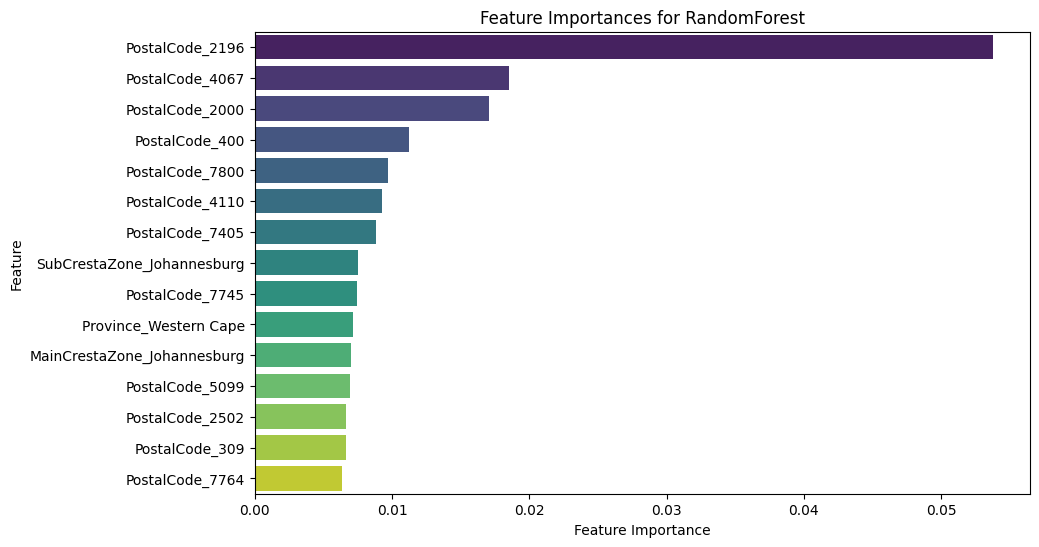

Missing values in transformed features:
0    0
dtype: int64


c:\Users\AII\Desktop\Insurance-Data-Analytics\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4001952802.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


DecisionTree - Accuracy: 0.70, F1 Score: 0.58, Precision: 0.66, Recall: 0.70
Feature Importances for DecisionTree:
                           Feature  Importance
434                PostalCode_2196    0.067779
391                PostalCode_2000    0.035984
2                 Province_Gauteng    0.026496
588                PostalCode_4067    0.020225
8            Province_Western Cape    0.019810
..                             ...         ...
952  SubCrestaZone_Transvaal South    0.000000
935          SubCrestaZone_Natal 3    0.000000
1              Province_Free State    0.000000
9             Country_South Africa    0.000000
0            Province_Eastern Cape    0.000000

[957 rows x 2 columns]


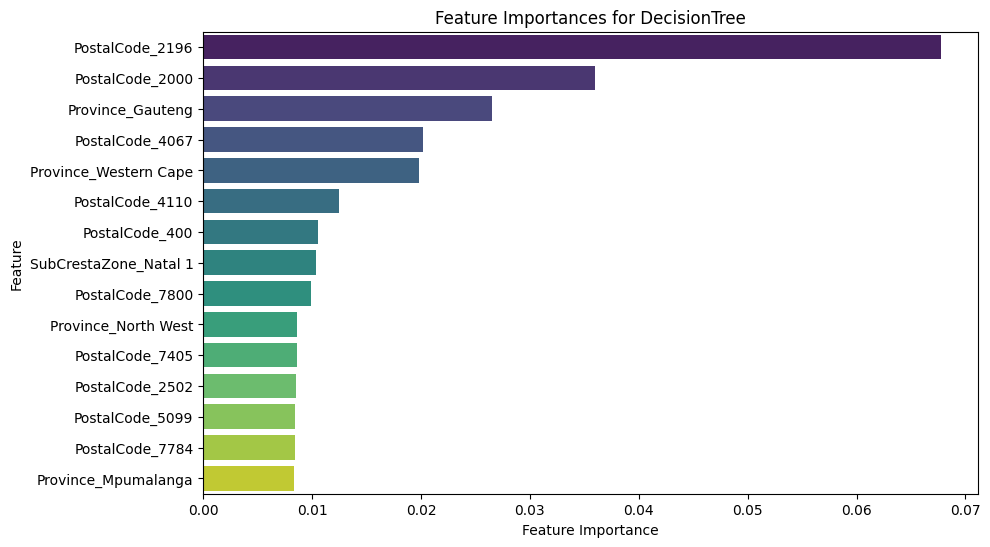

Missing values in transformed features:
0    0
dtype: int64


c:\Users\AII\Desktop\Insurance-Data-Analytics\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4001952802.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


XGBoost - Accuracy: 0.70, F1 Score: 0.58, Precision: 0.49, Recall: 0.70
Feature Importances for XGBoost:
                      Feature  Importance
434           PostalCode_2196    0.026271
391           PostalCode_2000    0.021145
8       Province_Western Cape    0.021121
908  MainCrestaZone_Rand East    0.008210
771           PostalCode_7405    0.008046
..                        ...         ...
51             PostalCode_161    0.000000
426           PostalCode_2188    0.000000
385           PostalCode_1949    0.000000
388           PostalCode_1982    0.000000
22              PostalCode_35    0.000000

[957 rows x 2 columns]


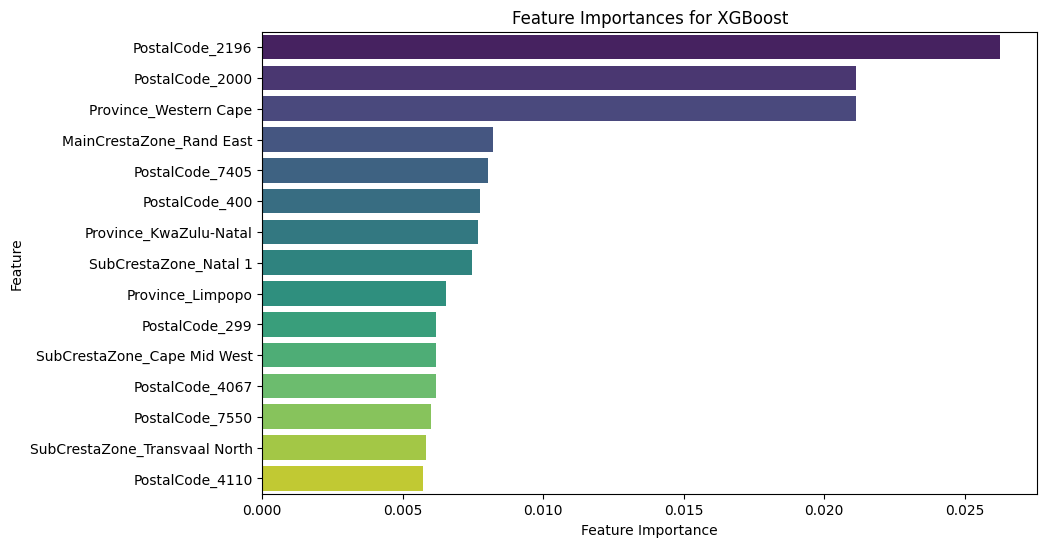

Missing values in transformed features:
0    0
dtype: int64


In [23]:
# Ensure the correct column names match your dataset
print(data.columns)

# Define categorical columns related with owners location
categorical_cols = ['Province', 'Country', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone']

# Define target variable
target = 'PremiumCategory'

# Prepare features and target
X = data[categorical_cols]
y = data[target]


# Handle missing values for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Combine transformers for categorical columns only
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Check for missing values after splitting
print("Missing values in training features:")
print(X_train.isnull().sum())

print("Missing values in test features:")
print(X_test.isnull().sum())

# Define classification models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    # Create a pipeline that preprocesses the data and fits the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict and calculate metrics
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
    precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
    
    print(f"{name} - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")
    # Get and print feature importances

    if hasattr(model, 'feature_importances_'):
        # Get feature importances for tree-based models
        importances = model.feature_importances_
        feature_names = (pipeline.named_steps['preprocessor']
                                     .transformers_[0][1]  # Access categorical transformer
                                     .named_steps['onehot'].get_feature_names_out(categorical_cols))
        
        # Combine numerical and categorical feature names
        feature_names = np.concatenate([feature_names])  # No numerical_cols in this example
        feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
        print(f"Feature Importances for {name}:")
        print(feature_importances)

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')
        plt.title(f'Feature Importances for {name}')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()


    # Check for NaNs after transformation
    X_transformed = preprocessor.fit_transform(X)
    print("Missing values in transformed features:")
    print(pd.DataFrame(X_transformed).isnull().sum())


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'ProfitMargin',
       'PremiumCategory'],
      dtype='object')


C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4036471502.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4036471502.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols].fillna(X[numerical_cols].median(), inplace=True)  # Impute missing numerical values with median


RandomForest - Accuracy: 0.70, F1 Score: 0.59, Precision: 0.63, Recall: 0.70
Feature Importances for RandomForest:
                            Feature    Importance
4               CustomValueEstimate  6.370339e-02
12    NewVehicle_More than 6 months  2.475351e-02
1                     cubiccapacity  2.433156e-02
13               NewVehicle_unknown  2.190278e-02
2                         kilowatts  2.094197e-02
...                             ...           ...
1110          Model_50 C13D F/C D/C  9.135553e-07
1124              Model_A4 2.0 (B7)  5.168403e-07
1461         Model_VENTURE 1800 6+4  1.934998e-07
1491           Country_South Africa  0.000000e+00
946                Language_English  0.000000e+00

[1492 rows x 2 columns]


C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4036471502.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


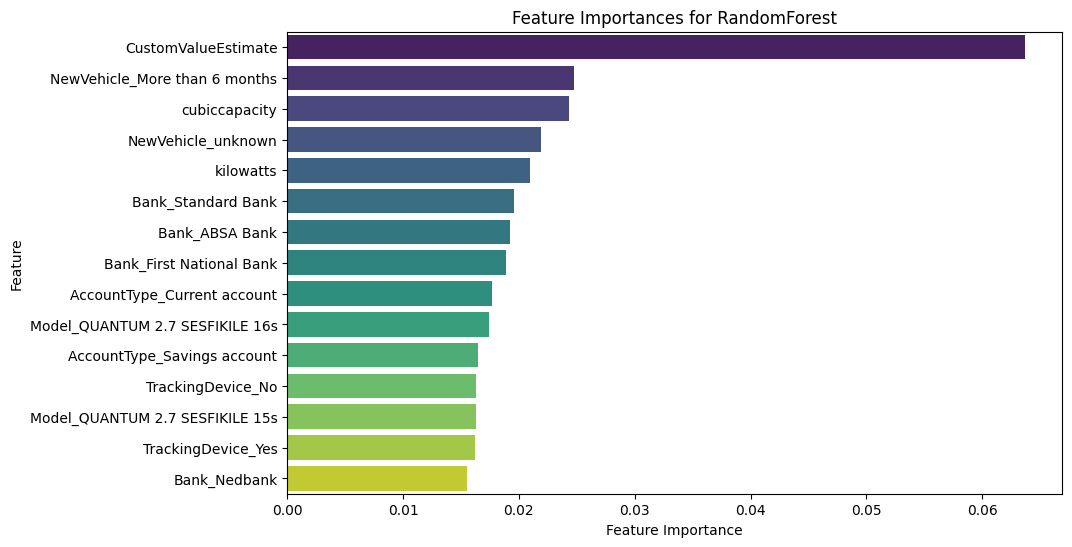

DecisionTree - Accuracy: 0.70, F1 Score: 0.59, Precision: 0.63, Recall: 0.70
Feature Importances for DecisionTree:
                                Feature  Importance
13                   NewVehicle_unknown    0.070142
4                   CustomValueEstimate    0.065685
1                         cubiccapacity    0.036613
1017                 Bank_Standard Bank    0.019493
993                  TrackingDevice_Yes    0.018353
...                                 ...         ...
1471         Model_VITO 112 CDI CREWBUS    0.000000
1458    Model_TURBODAILY 35.10V P/V P/V    0.000000
1446  Model_TERRITORY 4.0i GHIA AWD A/T    0.000000
1448   Model_TIIDA 1.6 ACENTA 5Dr (H36)    0.000000
10                       Gender_unknown    0.000000

[1492 rows x 2 columns]


C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4036471502.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


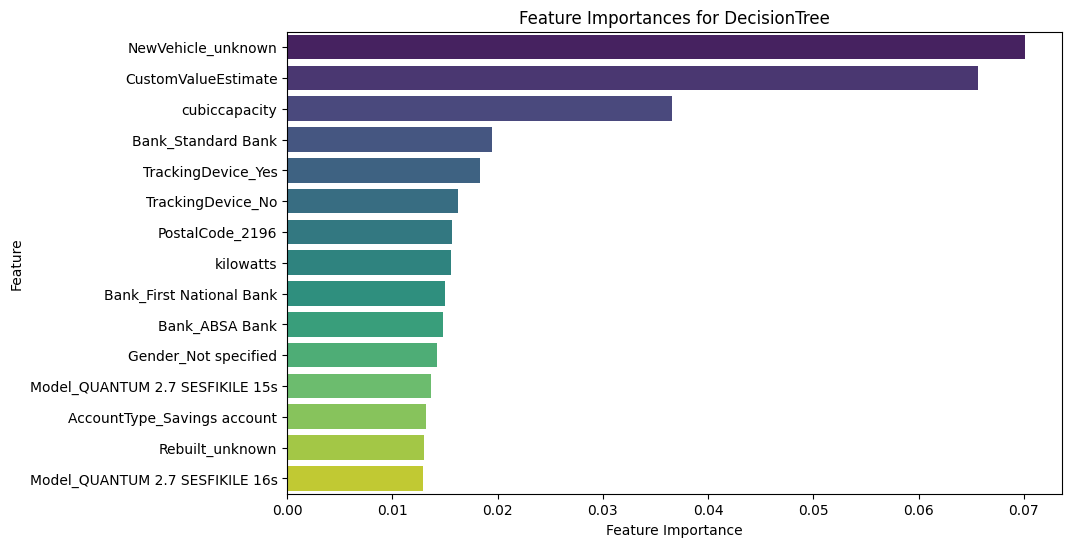

XGBoost - Accuracy: 0.70, F1 Score: 0.58, Precision: 0.70, Recall: 0.70
Feature Importances for XGBoost:
                                 Feature  Importance
13                    NewVehicle_unknown    0.051147
466                      PostalCode_2196    0.017694
940                  Province_North West    0.007409
423                      PostalCode_2000    0.007281
1019                        bodytype_B/S    0.007083
...                                  ...         ...
1477                  Model_YARIS T1 3Dr    0.000000
1476                 Model_YARIS 1.3 5Dr    0.000000
1475  Model_X TRAIL 2.0 4X2 XE (R79/R85)    0.000000
1474     Model_VOLARE W8 28 SEAT B/S B/S    0.000000
1473          Model_VITO 116 CDi CREWBUS    0.000000

[1492 rows x 2 columns]


C:\Users\AII\AppData\Local\Temp\ipykernel_14848\4036471502.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


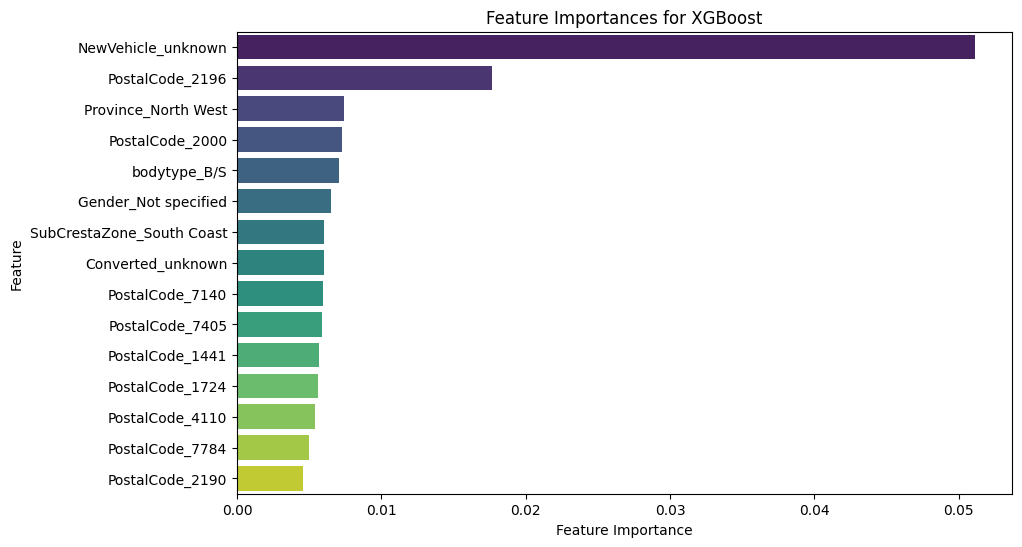

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure column names match your dataset
print(data.columns)

# Define categorical columns and remove duplicates
categorical_cols = list(set([
    'make', 'Model', 'VehicleType', 'bodytype', 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle',
    'WrittenOff', 'Rebuilt', 'Converted', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title',
    'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Province', 'Country',
    'PostalCode', 'MainCrestaZone', 'SubCrestaZone'
]))

# Define numerical columns
numerical_cols = ['Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate']

# Define target variable
target = 'PremiumCategory'

# Prepare data
X = data[numerical_cols + categorical_cols]
y = data[target]

# Step 1: Handle infinite or large values in numerical columns
X[numerical_cols].replace([np.inf, -np.inf], np.nan, inplace=True)
X[numerical_cols].fillna(X[numerical_cols].median(), inplace=True)  # Impute missing numerical values with median

# Step 2: Handle missing values for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Fill missing values with 'Unknown'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Handle missing values for target
y = y.dropna()

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Combine transformers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Step 3: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Define classification models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    # Create a pipeline that preprocesses the data and fits the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
    precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
    
    print(f"{name} - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

    # Get and print feature importances
    if hasattr(model, 'feature_importances_'):
        # Get feature importances for tree-based models
        importances = model.feature_importances_
        feature_names = (pipeline.named_steps['preprocessor']
                                     .transformers_[1][1]  # Access categorical transformer
                                     .named_steps['onehot'].get_feature_names_out(categorical_cols))
        
        # Combine numerical and categorical feature names
        all_features = np.concatenate([numerical_cols, feature_names])
        feature_importances = pd.DataFrame({'Feature': all_features, 'Importance': importances})
        feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
        print(f"Feature Importances for {name}:")
        print(feature_importances)

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')
        plt.title(f'Feature Importances for {name}')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.show()


In [ ]:
if name in ['RandomForest', 'DecisionTree', 'XGBoost']:
    # Transform the training data
    X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
    X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
    
    # Convert the CSR matrices to dense arrays
    X_train_transformed_dense = X_train_transformed.toarray()
    X_test_transformed_dense = X_test_transformed.toarray()

    # Prepare the model and data for SHAP
    explainer = shap.Explainer(pipeline.named_steps['classifier'], X_train_transformed_dense)
    shap_values = explainer(X_test_transformed_dense)
    
    # Summary plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test_transformed_dense, feature_names=pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_cols))
    plt.title(f'SHAP Summary Plot for {name}')
    plt.show()

    # Dependence plot for a specific feature (replace 'FeatureName' with an actual feature name)
    feature_name = 'FeatureName'  # Replace with an actual feature name
    if feature_name in pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_cols):
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(ind=feature_name, shap_values=shap_values, features=X_test_transformed, feature_names=pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_cols))
        plt.title(f'SHAP Dependence Plot for {name}')
        plt.show()
    else:
        print(f"Feature {feature_name} not found in the transformed features.")